In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.svm import SVC
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy.stats
import seaborn



## Data Analysis

In [95]:
# Load dataset
# # Fetch dataset
wine_quality = pd.read_csv('https://archive.ics.uci.edu/static/public/186/data.csv')

# Access the data and convert it to a DataFrame
display(wine_quality)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


## Split wine data set to red and white wine

In [96]:
#split the data into red and white color
red_wine = wine_quality[wine_quality['color'] == 'red']
white_wine = wine_quality[wine_quality['color'] == 'white']
display(red_wine)
display(white_wine)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
1602,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
1603,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [97]:
def call(functionToCall):
    print('\nRed Wine\n')
    functionToCall(red_wine)
    print('\nWhite Wine\n')
    functionToCall(white_wine)

In [98]:
def rm(wine_set):
    wine_set.columns = [x.strip().replace(' ','_') for x in wine_set.columns]
call(rm)


Red Wine


White Wine



In [99]:
def add_categ_quality(wine_set):
    low = wine_set[wine_set['quality'] <= 5]
    medium = wine_set[(wine_set['quality'] == 6) | (wine_set['quality'] == 7)]
    high = wine_set[wine_set['quality'] > 7]
    
    low['quality_mark'] = 'low'
    medium['quality_mark'] = 'medium'
    high['quality_mark'] = 'high'
    
    frames = [low, medium, high]
    return pd.concat(frames)

In [100]:
# Calculating the F-statistics and associated p-value
def anova(wine_set):
    prepared_data = add_categ_quality(wine_set)
    model1 = smf.ols(formula='total_sulfur_dioxide ~ C(quality_mark)', data = prepared_data)
    results1 = model1.fit()
    print(results1.summary())
    
    sub = prepared_data[['total_sulfur_dioxide', 'quality_mark']]
    print("\nMeans for total sulfur dioxide by quality marks of wine \n")
    print(sub.groupby('quality_mark').mean())
    print('\nStandard deviation for total sulfur dioxide by quality marks of wine \n')
    print(sub.groupby('quality_mark').std(), '\n')
    
    # Perform Post hoc test
    mc1 = multi.MultiComparison(sub['total_sulfur_dioxide'], sub['quality_mark'])
    res1 = mc1.tukeyhsd()
    print(res1.summary())
    
call(anova)


Red Wine

                             OLS Regression Results                             
Dep. Variable:     total_sulfur_dioxide   R-squared:                       0.054
Model:                              OLS   Adj. R-squared:                  0.053
Method:                   Least Squares   F-statistic:                     45.71
Date:                  Wed, 19 Mar 2025   Prob (F-statistic):           4.97e-20
Time:                          16:37:33   Log-Likelihood:                -7809.7
No. Observations:                  1599   AIC:                         1.563e+04
Df Residuals:                      1596   BIC:                         1.564e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

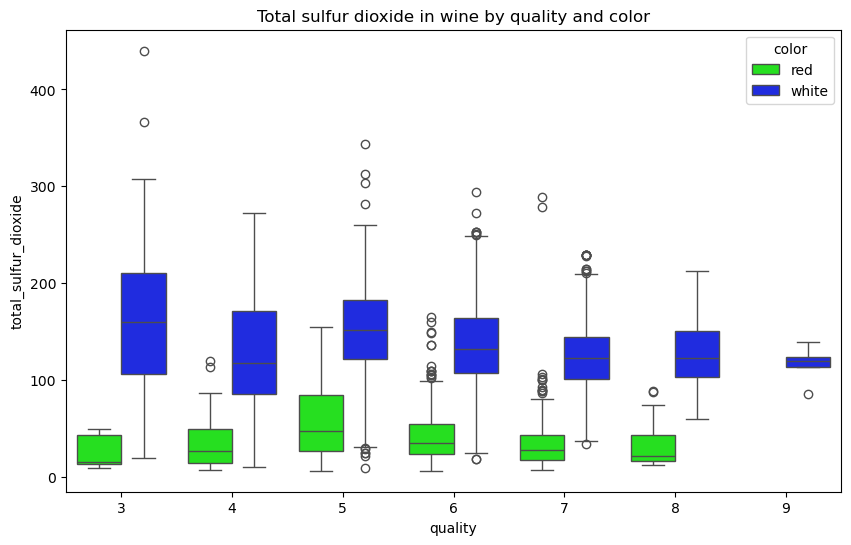

In [101]:
plot = plt.figure(figsize=(10,6))
seaborn.boxplot(x='quality', y='total_sulfur_dioxide', hue='color', data=wine_quality, palette='hsv')
plt.title('Total sulfur dioxide in wine by quality and color')
plt.show()

Text(0.5, 1.0, 'Alcohol in wine by quality and color')

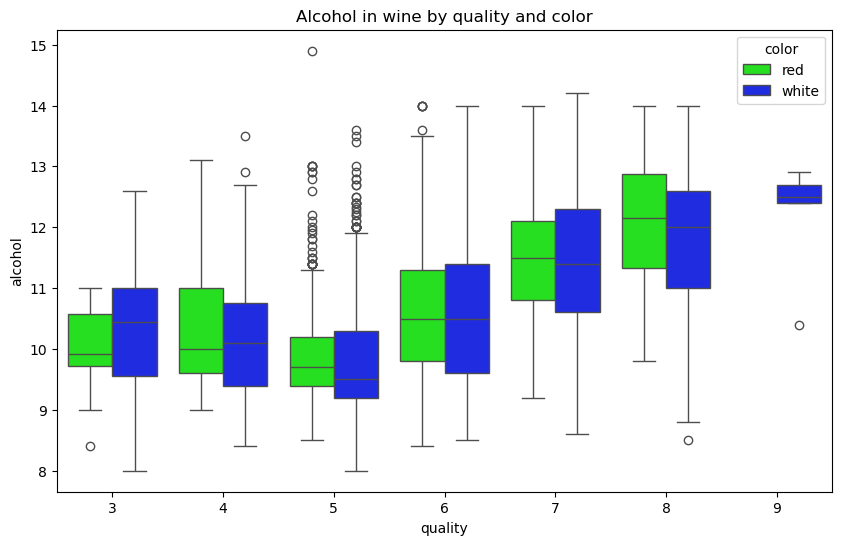

In [102]:
plt.figure(figsize=(10,6))
seaborn.boxplot(x='quality', y='alcohol', hue='color', data=wine_quality, palette='hsv')
plt.title('Alcohol in wine by quality and color')


Text(0.5, 1.0, 'Citric Acid in wine by quality and color')

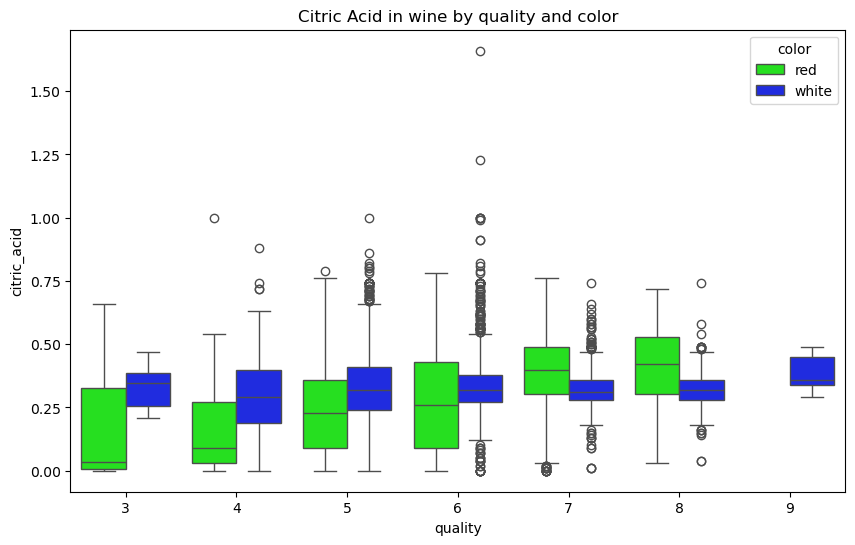

In [103]:
plt.figure(figsize=(10,6))
seaborn.boxplot(x='quality', y='citric_acid', hue='color', data=wine_quality, palette='hsv')
plt.title('Citric Acid in wine by quality and color')


Text(0.5, 1.0, 'Volatile Acidity in wine by quality and color')

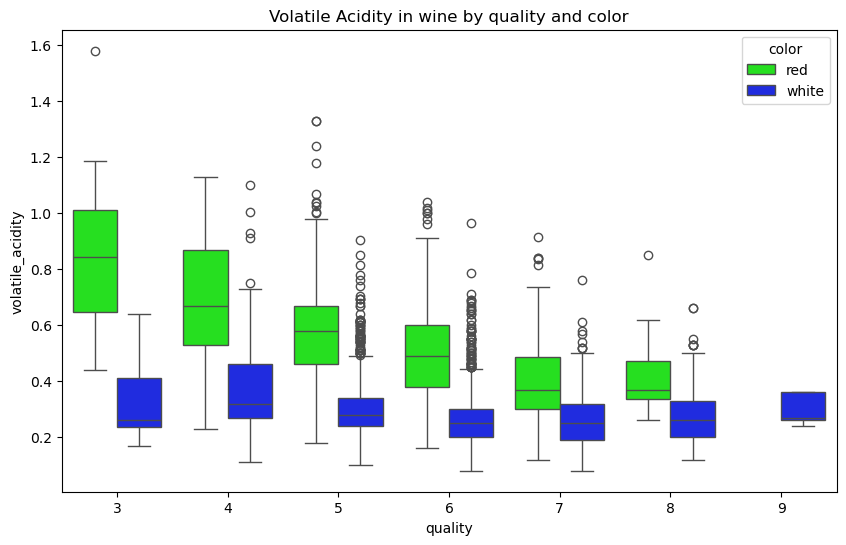

In [104]:
plt.figure(figsize=(10,6))
seaborn.boxplot(x='quality', y='volatile_acidity', hue='color', data=wine_quality, palette='hsv')
plt.title('Volatile Acidity in wine by quality and color')

Text(0.5, 1.0, 'Residual Sugar in wine by quality and color')

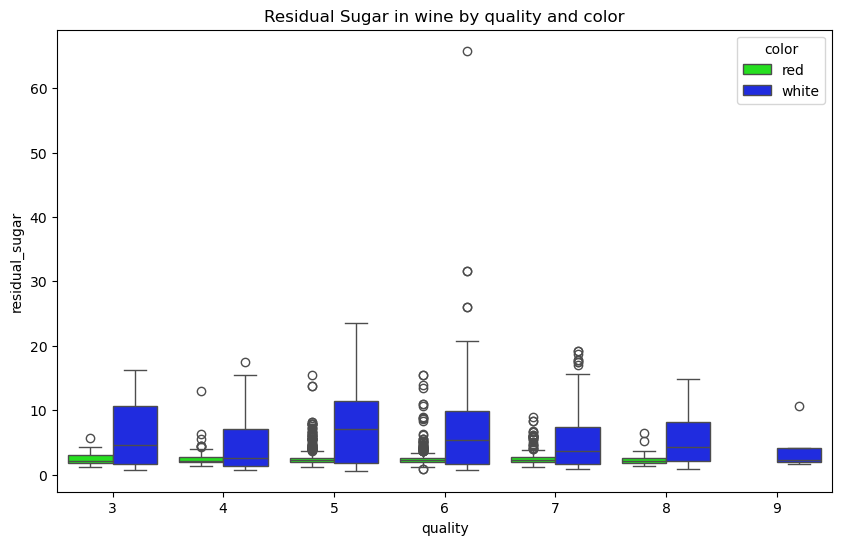

In [105]:
plt.figure(figsize=(10,6))
seaborn.boxplot(x='quality', y='residual_sugar', hue='color', data=wine_quality, palette='hsv')
plt.title('Residual Sugar in wine by quality and color')

## Correlation Matrix
### Positive
### Negative

<Axes: >

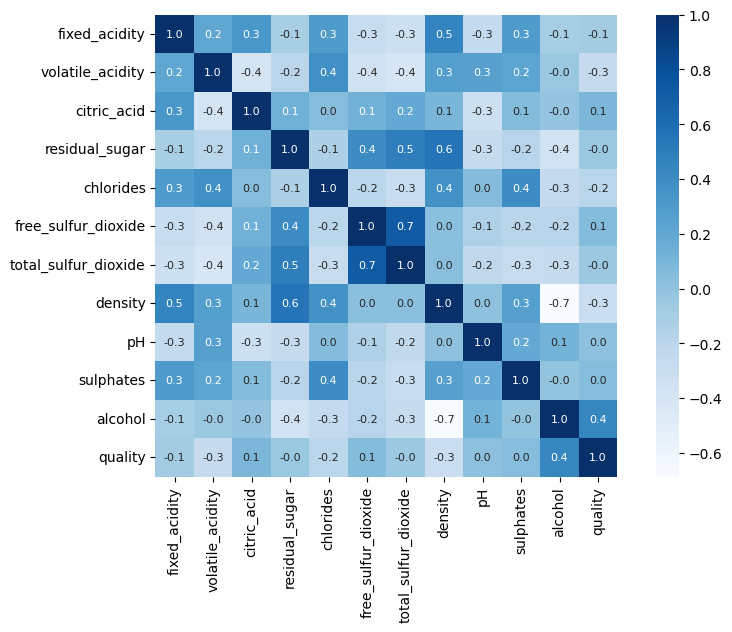

In [106]:
#drop the quality_mark and color columns and construct a correlation matrix between the remaining columns
wine_quality_drop = wine_quality.drop(['color'], axis=1)
correration = wine_quality_drop.corr()
plt.figure(figsize=(10,6))
seaborn.heatmap(correration, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


Red Wine



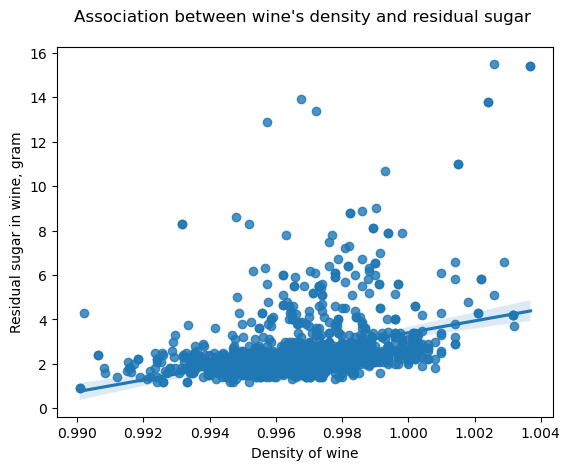

PearsonRResult(statistic=np.float64(0.35528337098337615), pvalue=np.float64(9.01304172829583e-49))

White Wine



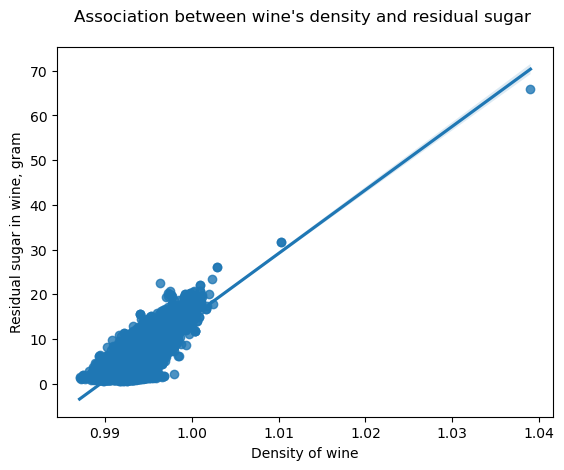

PearsonRResult(statistic=np.float64(0.8389664549045834), pvalue=np.float64(0.0))


In [107]:
def pearson(wine_set):
    scat1 = seaborn.regplot(x = "density", y = "residual_sugar", fit_reg = True, data = wine_set)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar \n")
    plt.show()

    print(scipy.stats.pearsonr(wine_set['density'], wine_set["residual_sugar"]))

call(pearson)


Red Wine

association between wine`s density and residual sugar for wines 
of `low` quality
PearsonRResult(statistic=np.float64(0.40512747741473665), pvalue=np.float64(9.32999030472658e-31))

of `medium` quality
PearsonRResult(statistic=np.float64(0.33017251719442), pvalue=np.float64(9.754348168755181e-23))

of `high` quality
PearsonRResult(statistic=np.float64(0.5797231322874947), pvalue=np.float64(0.011679205341893857))


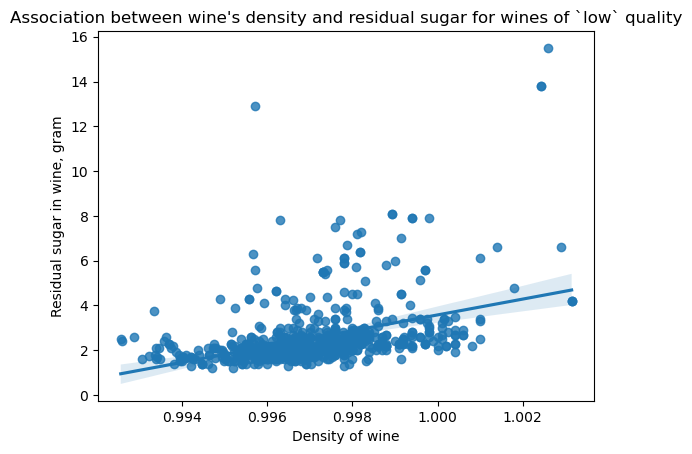

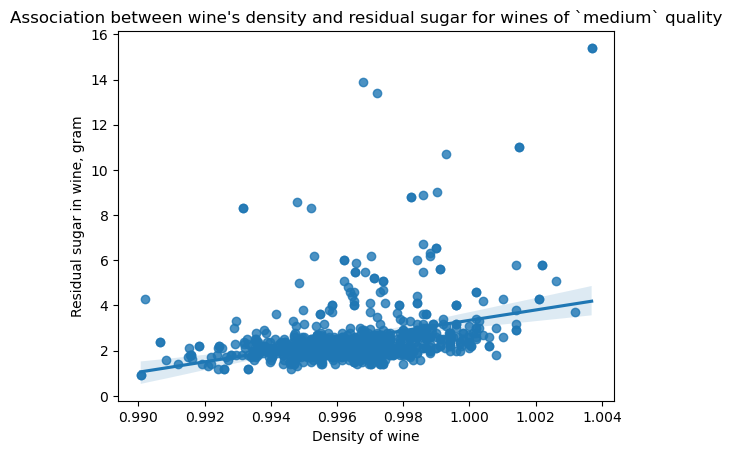

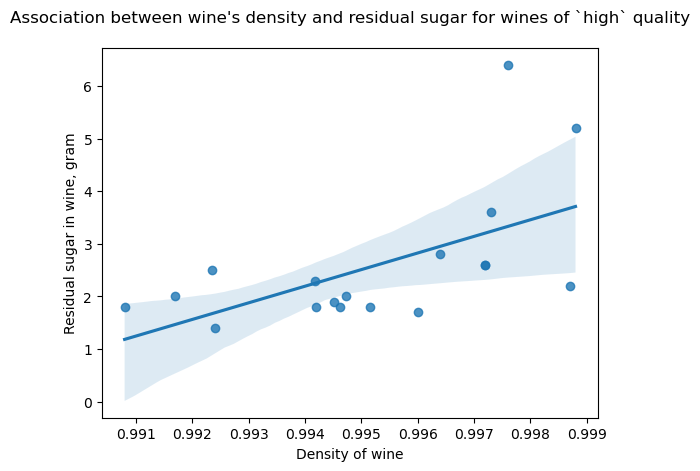


White Wine

association between wine`s density and residual sugar for wines 
of `low` quality
PearsonRResult(statistic=np.float64(0.8796644895829153), pvalue=np.float64(0.0))

of `medium` quality
PearsonRResult(statistic=np.float64(0.8458419941200983), pvalue=np.float64(0.0))

of `high` quality
PearsonRResult(statistic=np.float64(0.8210870208105541), pvalue=np.float64(3.274380626883886e-45))


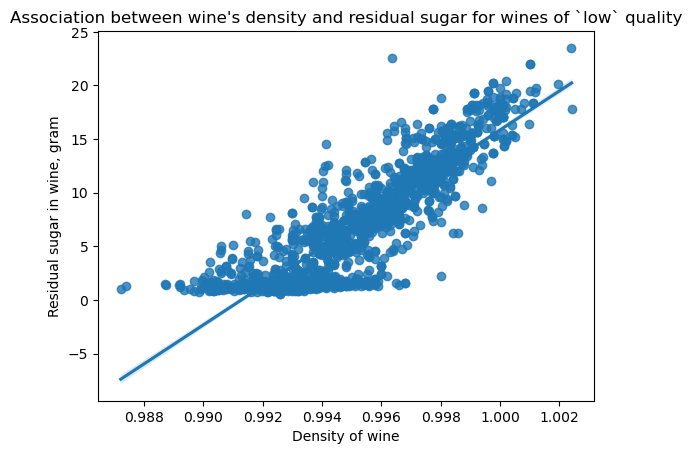

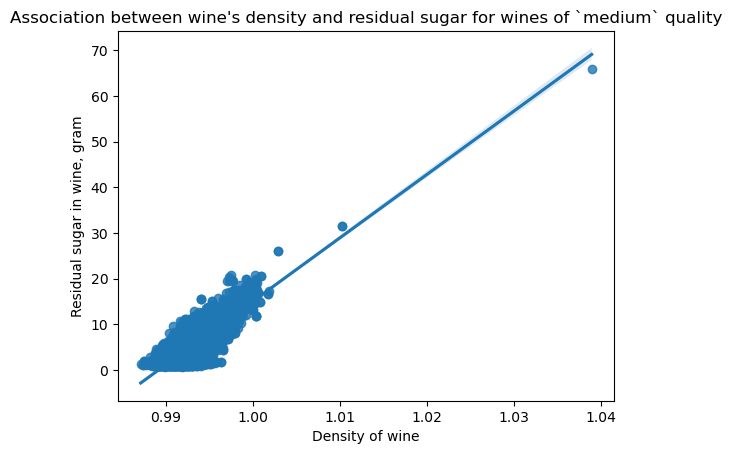

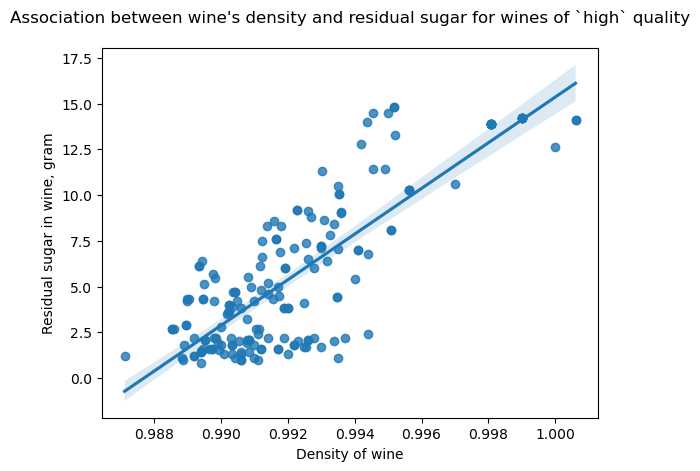

In [108]:
# Exploring Statistical Interactions
def explore(wine_set):
    low = wine_set[wine_set['quality'] <= 5]
    medium = wine_set[(wine_set['quality'] == 6) | (wine_set['quality'] == 7)]
    high = wine_set[wine_set['quality'] > 7]

    print('association between wine`s density and residual sugar for wines \nof `low` quality')
    print(scipy.stats.pearsonr(low['density'], low["residual_sugar"]))
    print('\nof `medium` quality')
    print(scipy.stats.pearsonr(medium['density'], medium["residual_sugar"]))
    print('\nof `high` quality')
    print(scipy.stats.pearsonr(high['density'], high["residual_sugar"]))

    scat0 = seaborn.regplot(x="density", y="residual_sugar", fit_reg=True, data=low)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar for wines of `low` quality")
    plt.show()

    scat0 = seaborn.regplot(x="density", y="residual_sugar", fit_reg=True, data=medium)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar for wines of `medium` quality")
    plt.show()

    scat0 = seaborn.regplot(x="density", y="residual_sugar", fit_reg=True, data=high)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar for wines of `high` quality\n")
    plt.show()

call(explore)

## Data Exploration

In [109]:
# print frequency distributions of wines' quality 
def frequencyDists(wine_set):
    print("This is the frequency distribution of the wines' quality.")
    print(wine_set.groupby("quality").size()*100 / len(wine_set))
    print()

call(frequencyDists)


Red Wine

This is the frequency distribution of the wines' quality.
quality
3     0.625391
4     3.314572
5    42.589118
6    39.899937
7    12.445278
8     1.125704
dtype: float64


White Wine

This is the frequency distribution of the wines' quality.
quality
3     0.408330
4     3.327889
5    29.746835
6    44.875459
7    17.966517
8     3.572887
9     0.102082
dtype: float64



In [110]:
# print quartile split of the quality variable 
def quartileSplit(wine_set):
    print("This is the quartile split of the wines' quality. I-st column contains the intervals of wines' quality;")
    print("II-nd - the number of wine samples with the quality in the corresponding interval.")
    wine_set["quality_quart"] = pd.qcut(wine_set["quality"], 3)
    print(wine_set.groupby("quality_quart").size())

call(quartileSplit)


Red Wine

This is the quartile split of the wines' quality. I-st column contains the intervals of wines' quality;
II-nd - the number of wine samples with the quality in the corresponding interval.
quality_quart
(2.999, 5.0]    744
(5.0, 6.0]      638
(6.0, 8.0]      217
dtype: int64

White Wine

This is the quartile split of the wines' quality. I-st column contains the intervals of wines' quality;
II-nd - the number of wine samples with the quality in the corresponding interval.
quality_quart
(2.999, 5.0]    1640
(5.0, 6.0]      2198
(6.0, 9.0]      1060
dtype: int64



Red Wine



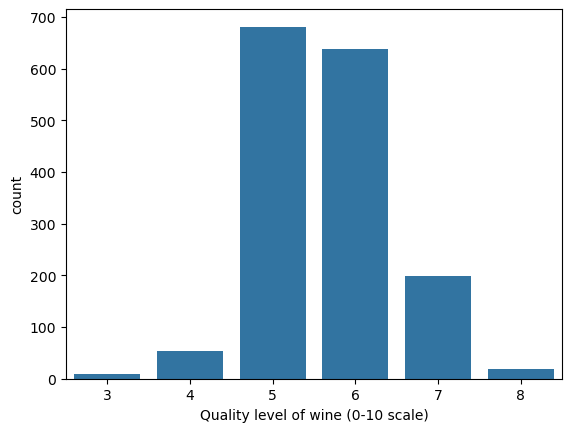


White Wine



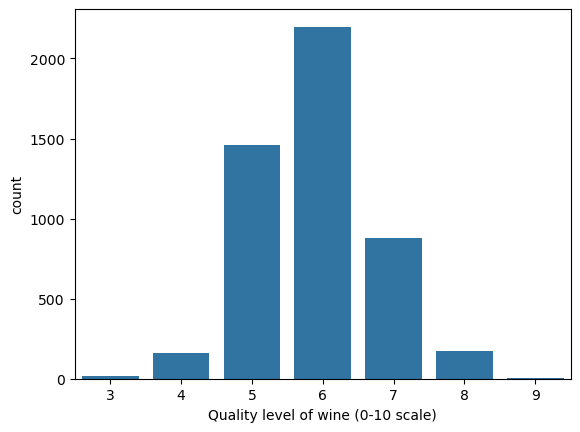

In [111]:
## get the how the number of wine quality level is distributed and visualized with countplots and factorplots 
def countplots(wine_set):
    wine_set["quality"] = pd.Categorical(wine_set["quality"])
    seaborn.countplot(x="quality", data=wine_set)
    plt.xlabel("Quality level of wine (0-10 scale)")
    plt.show()

call(countplots)


Red Wine



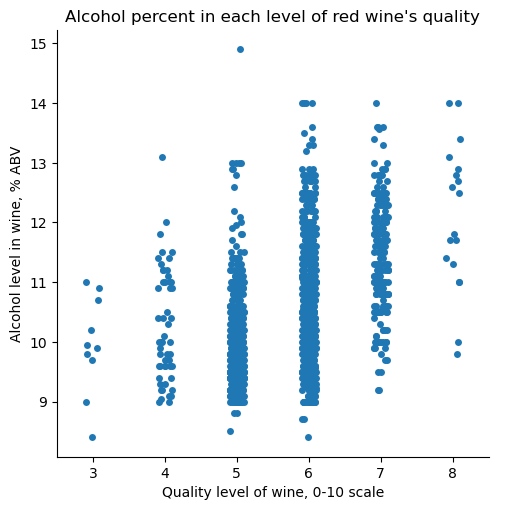


White Wine



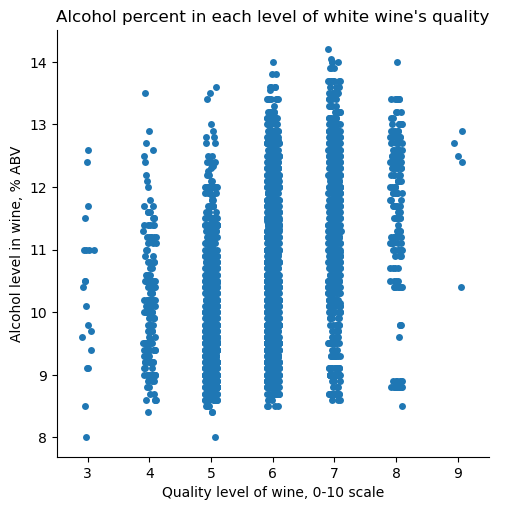

In [112]:
# visualizing the alcohol percent in each level of quality of wine using catplot
def catplot(wine_set):
    seaborn.catplot(x="quality", y="alcohol", data=wine_set, kind="strip")
    plt.xlabel("Quality level of wine, 0-10 scale")
    plt.ylabel("Alcohol level in wine, % ABV")
    if wine_set.equals(red_wine):
        plt.title("Alcohol percent in each level of red wine's quality")
    else:
        plt.title("Alcohol percent in each level of white wine's quality")
    plt.show()

call(catplot)

## Model Building

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import time
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import matplotlib.pyplot as plt
import operator
from sklearn import preprocessing
from sklearn.linear_model import LassoLarsCV
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Logistic Regression

In [114]:
def log_regression(wine_set):
    # local variable to identify if the wine_set red or white
    w = wine_set


    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)


    # split into training and testing sets
    predictors = wine_set[["sulphates", 'alcohol']]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

    # build model on training data
    classifier = LogisticRegression()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)

     # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print ('Score:', classifier.score(pred_test, tar_test))
    print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)

print('----------------Logistic Regression------------------------')
call(log_regression)

----------------Logistic Regression------------------------

Red Wine

Confusion Matrix:
 [[205  93]
 [103 239]]
Accuracy: 0.69375
Score: 0.69375
RMSE: 0.5533985905294664

White Wine

Confusion Matrix:
 [[ 291  354]
 [ 229 1086]]
Accuracy: 0.7025510204081633
Score: 0.7025510204081633
RMSE: 0.5453888333948879


## Decision Tree

In [115]:
def decis_tree(wine_set):
    # local variable to identify if the wine_set red or white
    w = wine_set


    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)


    # split into training and testing sets
    predictors = wine_set[["residual_sugar", 'alcohol']]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

    # build model on training data
    classifier = DecisionTreeClassifier()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)

     # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print ('Score:', classifier.score(pred_test, tar_test))
    print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)

print('----------------Decision Tree------------------------')
call(decis_tree)

----------------Decision Tree------------------------

Red Wine

Confusion Matrix:
 [[237  68]
 [151 184]]
Accuracy: 0.6578125
Score: 0.6578125
RMSE: 0.5849679478398795

White Wine

Confusion Matrix:
 [[413 299]
 [283 965]]
Accuracy: 0.7030612244897959
Score: 0.7030612244897959
RMSE: 0.5449208892217329


## K-NN

In [116]:
def knn(wine_set):
    
    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)

    # split into training and testing sets
    predictors = wine_set[["residual_sugar", 'alcohol']]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)
    
    
    # build model on training data
    classifier = KNeighborsClassifier()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)

    # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print ('Score:', classifier.score(pred_test, tar_test))
    print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)

    
print('----------------KNN------------------------')
call(knn)

----------------KNN------------------------

Red Wine

Confusion Matrix:
 [[186 117]
 [ 96 241]]
Accuracy: 0.6671875
Score: 0.6671875
RMSE: 0.5768990379607163

White Wine

Confusion Matrix:
 [[ 346  301]
 [ 287 1026]]
Accuracy: 0.7
Score: 0.7
RMSE: 0.5477225575051661


## Naive Bayes

In [117]:
def naive(wine_set):
   
    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)

    # split into training and testing sets
    predictors = wine_set[["density", 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 'fixed_acidity',
                           'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)
    

    classifier = GaussianNB()
    classifier.fit(pred_train, tar_train)
    predictionsG = classifier.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictionsG))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictionsG))
    print("Gaus:" + str(classifier.score(pred_test, tar_test)))
    mse = mean_squared_error(predictionsG, tar_test)
    print('MSE:',mse ** 0.5)

    classifierm = MultinomialNB()
    classifierm.fit(pred_train, tar_train)
    predictionsM = classifierm.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('\nConfusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictionsM))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictionsM))
    print("Multi:" + str(classifierm.score(pred_test, tar_test)))
    mse = mean_squared_error(predictionsM, tar_test)
    print('MSE:',mse ** 0.5)

    classifierb = BernoulliNB()
    classifierb.fit(pred_train, tar_train)
    predictionsB = classifierb.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('\nConfusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictionsB))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictionsB))
    print("Bernoulli:" + str(classifierb.score(pred_test, tar_test)))
    mse = mean_squared_error(predictionsB, tar_test)
    print('MSE:',mse ** 0.5)
    

print('----------------Naive Bayes------------------------')
call(naive)

----------------Naive Bayes------------------------

Red Wine

Confusion Matrix:
 [[234  69]
 [114 223]]
Accuracy: 0.7140625
Gaus:0.7140625
MSE: 0.534731240905186

Confusion Matrix:
 [[146 157]
 [ 88 249]]
Accuracy: 0.6171875
Multi:0.6171875
MSE: 0.6187184335382291

Confusion Matrix:
 [[  0 303]
 [  0 337]]
Accuracy: 0.5265625
Bernoulli:0.5265625
MSE: 0.6880679472261443

White Wine

Confusion Matrix:
 [[ 355  335]
 [ 250 1020]]
Accuracy: 0.701530612244898
Gaus:0.701530612244898
MSE: 0.5463235193135126

Confusion Matrix:
 [[ 251  439]
 [ 224 1046]]
Accuracy: 0.661734693877551
Multi:0.661734693877551
MSE: 0.5816057995949223

Confusion Matrix:
 [[   6  684]
 [   4 1266]]
Accuracy: 0.6489795918367347
Bernoulli:0.6489795918367347
MSE: 0.5924697529522206


## Random Forest

----------------Random Forests------------------------

Red Wine

Confusion matrix:
 [[223  80]
 [ 59 278]]
Accuracy: 0.7828125


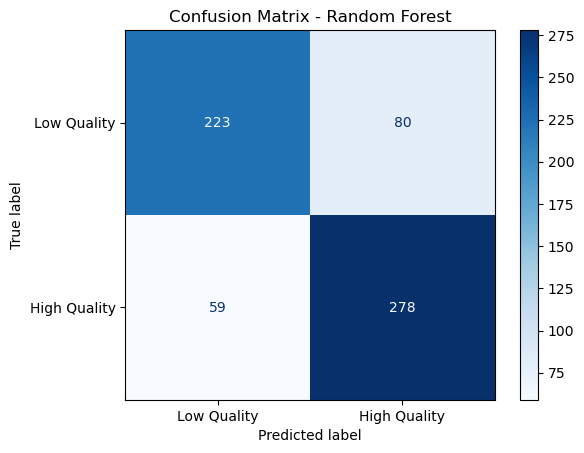


Importance of predictors:
[('alcohol', np.float64(0.1993639042053648)), ('sulphates', np.float64(0.11009896123069583)), ('volatile_acidity', np.float64(0.10283227130000766)), ('total_sulfur_dioxide', np.float64(0.09850342693186374)), ('density', np.float64(0.08440130325400504)), ('citric_acid', np.float64(0.07265928643533284)), ('chlorides', np.float64(0.06779777101958089)), ('fixed_acidity', np.float64(0.06735154135036238)), ('residual_sugar', np.float64(0.06723417120722004)), ('free_sulfur_dioxide', np.float64(0.06684362935917078)), ('pH', np.float64(0.06291373370639596))]


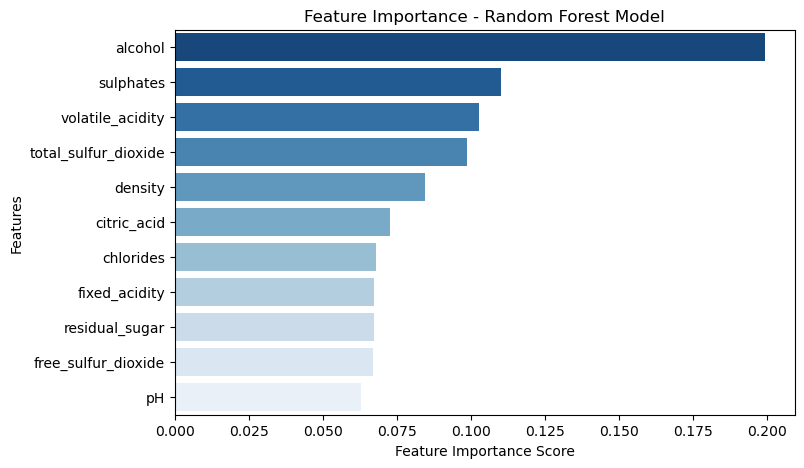

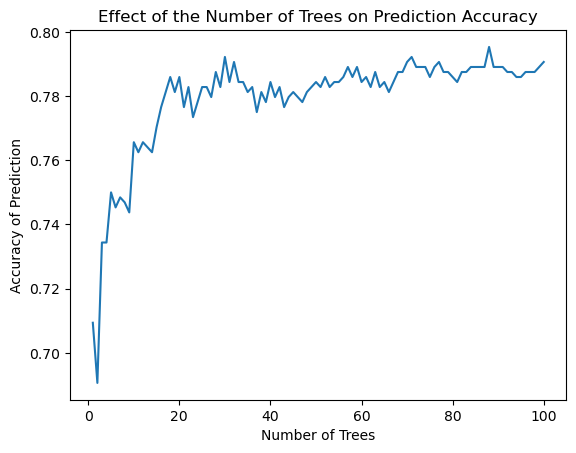

[0.709375, 0.690625, 0.734375, 0.734375, 0.75, 0.7453125, 0.7484375, 0.746875, 0.74375, 0.765625, 0.7625, 0.765625, 0.7640625, 0.7625, 0.7703125, 0.7765625, 0.78125, 0.7859375, 0.78125, 0.7859375, 0.7765625, 0.7828125, 0.7734375, 0.778125, 0.7828125, 0.7828125, 0.7796875, 0.7875, 0.7828125, 0.7921875, 0.784375, 0.790625, 0.784375, 0.784375, 0.78125, 0.7828125, 0.775, 0.78125, 0.778125, 0.784375, 0.7796875, 0.7828125, 0.7765625, 0.7796875, 0.78125, 0.7796875, 0.778125, 0.78125, 0.7828125, 0.784375, 0.7828125, 0.7859375, 0.7828125, 0.784375, 0.784375, 0.7859375, 0.7890625, 0.7859375, 0.7890625, 0.784375, 0.7859375, 0.7828125, 0.7875, 0.7828125, 0.784375, 0.78125, 0.784375, 0.7875, 0.7875, 0.790625, 0.7921875, 0.7890625, 0.7890625, 0.7890625, 0.7859375, 0.7890625, 0.790625, 0.7875, 0.7875, 0.7859375, 0.784375, 0.7875, 0.7875, 0.7890625, 0.7890625, 0.7890625, 0.7890625, 0.7953125, 0.7890625, 0.7890625, 0.7890625, 0.7875, 0.7875, 0.7859375, 0.7859375, 0.7875, 0.7875, 0.7875, 0.7890625, 0.79

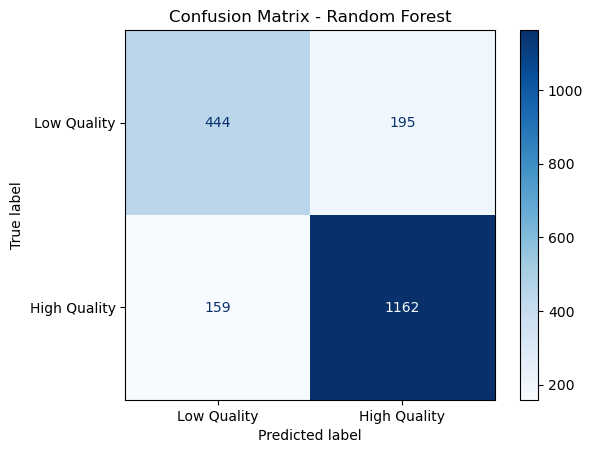


Importance of predictors:
[('alcohol', np.float64(0.16021163798980054)), ('volatile_acidity', np.float64(0.11594057890301027)), ('density', np.float64(0.09286236537134146)), ('free_sulfur_dioxide', np.float64(0.09136194009495358)), ('citric_acid', np.float64(0.0832251106298426)), ('total_sulfur_dioxide', np.float64(0.08279804068100667)), ('chlorides', np.float64(0.07757385201630748)), ('pH', np.float64(0.07556031925749754)), ('fixed_acidity', np.float64(0.07536012604726161)), ('residual_sugar', np.float64(0.07415248254756808)), ('sulphates', np.float64(0.07095354646141018))]


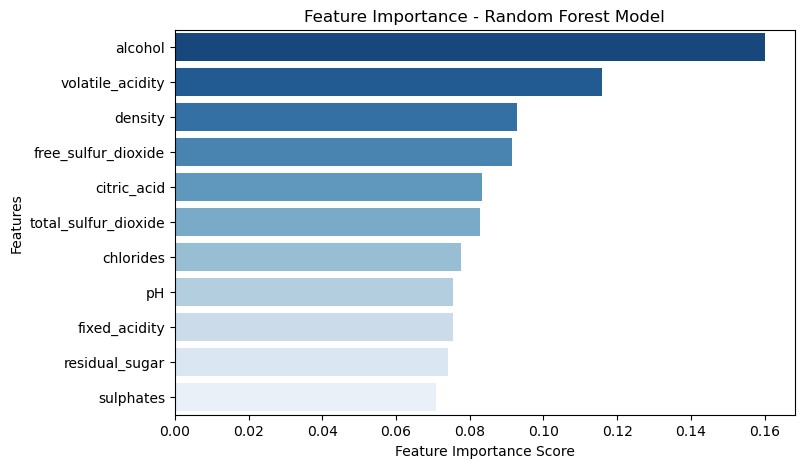

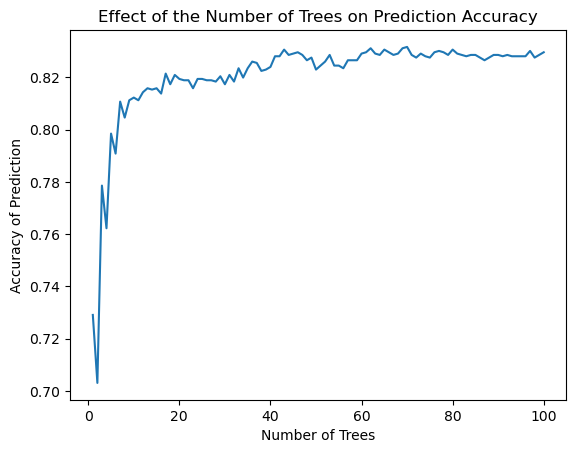

[0.7290816326530613, 0.7030612244897959, 0.7785714285714286, 0.7622448979591837, 0.798469387755102, 0.7908163265306123, 0.8107142857142857, 0.8045918367346939, 0.8112244897959183, 0.8122448979591836, 0.8112244897959183, 0.8142857142857143, 0.8158163265306122, 0.8153061224489796, 0.8158163265306122, 0.8137755102040817, 0.8214285714285714, 0.8173469387755102, 0.8209183673469388, 0.8193877551020409, 0.8188775510204082, 0.8188775510204082, 0.8158163265306122, 0.8193877551020409, 0.8193877551020409, 0.8188775510204082, 0.8188775510204082, 0.8183673469387756, 0.8204081632653061, 0.8173469387755102, 0.8209183673469388, 0.8183673469387756, 0.823469387755102, 0.8198979591836735, 0.823469387755102, 0.8260204081632653, 0.8255102040816327, 0.8224489795918367, 0.8229591836734694, 0.8239795918367347, 0.8280612244897959, 0.8280612244897959, 0.8306122448979592, 0.8285714285714286, 0.8290816326530612, 0.8295918367346938, 0.8285714285714286, 0.826530612244898, 0.8275510204081633, 0.8229591836734694, 0.8

In [118]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import operator
import sklearn
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split

def random_forests(wine_set):
    # Recode quality into 2 groups
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)

    # Split into training and testing sets
    predictors = wine_set[["density", 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 
                           'fixed_acidity', 'citric_acid', 'residual_sugar', 
                           'free_sulfur_dioxide', 'total_sulfur_dioxide']]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=0.4, random_state=42)

    # Train Random Forest Model
    classifier = RandomForestClassifier(n_estimators=25, random_state=42)
    classifier = classifier.fit(pred_train, tar_train)
    predictions = classifier.predict(pred_test)

    # Print Confusion Matrix and Accuracy
    print('Confusion matrix:\n', confusion_matrix(tar_test, predictions))
    print('Accuracy:', sklearn.metrics.accuracy_score(tar_test, predictions))

    # 🎯 Confusion Matrix Visualization
    cm = confusion_matrix(tar_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low Quality", "High Quality"])
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix - Random Forest")
    plt.show()

    # 🎯 Feature Importance
    model = ExtraTreesClassifier()
    model.fit(pred_train, tar_train)

    print('\nImportance of predictors:')
    dct = {predictors.columns[c]: model.feature_importances_[c] for c in range(len(predictors.columns))}
    sorted_features = sorted(dct.items(), key=operator.itemgetter(1), reverse=True)
    print(sorted_features)

    # 🎯 Feature Importance Visualization
    importance_df = pd.DataFrame(sorted_features, columns=["Feature", "Importance"])

    plt.figure(figsize=(8, 5))
    sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title("Feature Importance - Random Forest Model")
    plt.show()

    # Run different numbers of trees to evaluate accuracy
    n = 100
    accuracy = []

    for i in range(1, n+1):
        classifier = RandomForestClassifier(n_estimators=i, random_state=42)
        classifier.fit(pred_train, tar_train)
        predictions = classifier.predict(pred_test)
        accuracy.append(sklearn.metrics.accuracy_score(tar_test, predictions))

    plt.plot(range(1, n+1), accuracy)
    plt.xlabel("Number of Trees")
    plt.ylabel("Accuracy of Prediction")
    plt.title("Effect of the Number of Trees on Prediction Accuracy")
    plt.show()

    print(accuracy)

print('----------------Random Forests------------------------')
call(random_forests)


## Lasso Regression

----------------Lasso Regression------------------------

Red Wine

Predictors and their regression coefficients:
density : -0.021572503658281037
alcohol : 0.2922776462614959
sulphates : 0.13660850841439073
pH : -0.028284873495493374
volatile_acidity : -0.19049951851145094
chlorides : -0.08503328187564804
fixed_acidity : 0.0
citric_acid : 0.0
residual_sugar : 0.018806182887732722
free_sulfur_dioxide : -0.000768752825747922
total_sulfur_dioxide : -0.079511199158088

Alpha: 0.0079007285166846


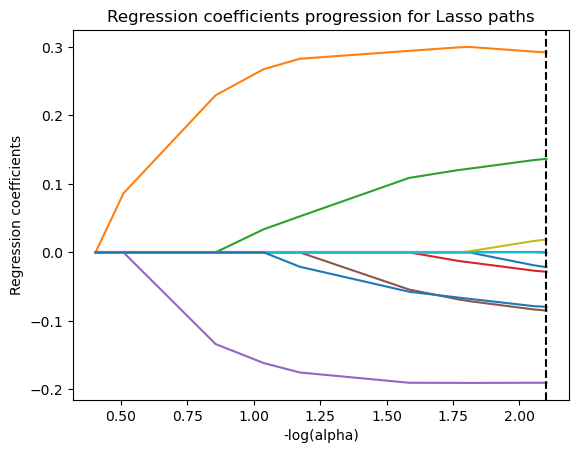

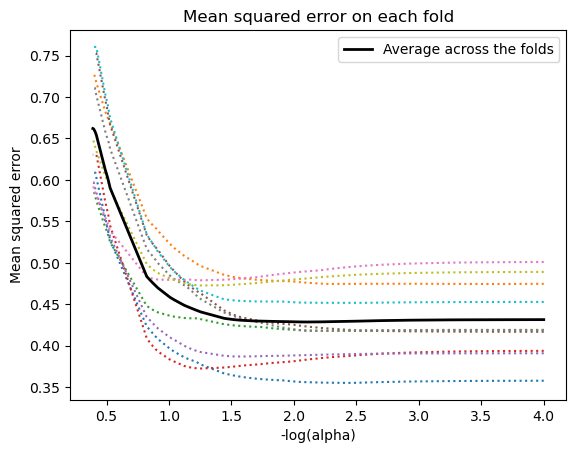


Mean squared error for training data: 0.42029339399595167
Mean squared error for test data: 0.42198423459503404

R-square for training data: 0.36310685437609236
R-square for test data: 0.3325381175122487

White Wine

Predictors and their regression coefficients:
density : -0.2536200409182376
alcohol : 0.32843552210755095
sulphates : 0.06805664866601689
pH : 0.05839319410630156
volatile_acidity : -0.19007168454687623
chlorides : -0.004311982448325017
fixed_acidity : 0.0
citric_acid : 0.0
residual_sugar : 0.2981528910978187
free_sulfur_dioxide : 0.05560433075433866
total_sulfur_dioxide : -0.013369575991470484

Alpha: 0.005173987309582285


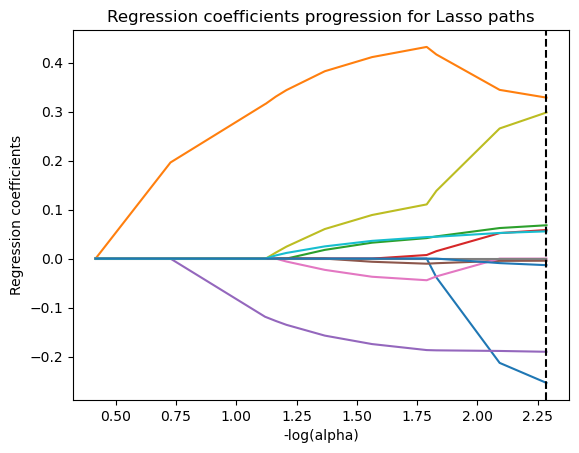

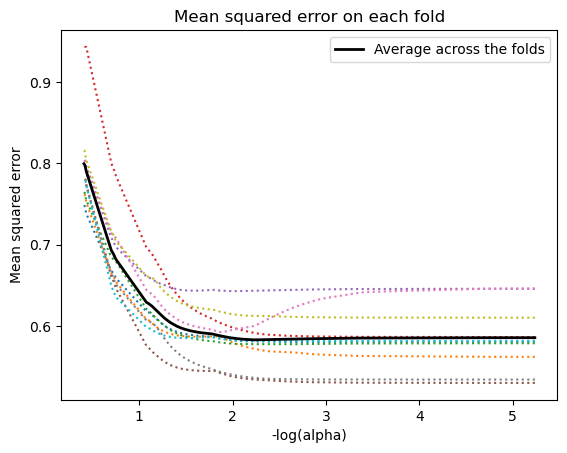


Mean squared error for training data: 0.5763098884270069
Mean squared error for test data: 0.5387292461735949

R-square for training data: 0.2785976211555916
R-square for test data: 0.2816593228315255


In [119]:
def lasso_regr(wine_set):

    pred = wine_set[["density", 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 'fixed_acidity',
                    'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']]
    predictors = pred.copy()
    targets = wine_set.quality

    # standardize predictors to have mean=0 and sd=1
    predictors = pd.DataFrame(preprocessing.scale(predictors))
    predictors.columns = pred.columns
    # print(predictors.head())

    # split into training and testing sets
    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.3, random_state=123)

    # specify the lasso regression model
    model = LassoLarsCV(cv=10, precompute=False).fit(pred_train, tar_train)

    print('Predictors and their regression coefficients:')
    d = dict(zip(predictors.columns, model.coef_))
    for k in d:
        print(k, ':', d[k])

    # plot coefficient progression
    m_log_alphas = -np.log10(model.alphas_)
    # ax = plt.gca()
    plt.plot(m_log_alphas, model.coef_path_.T)
    print('\nAlpha:', model.alpha_)
    plt.axvline(-np.log10(model.alpha_), linestyle="dashed", color='k', label='alpha CV')
    plt.ylabel("Regression coefficients")
    plt.xlabel("-log(alpha)")
    plt.title('Regression coefficients progression for Lasso paths')
    plt.show()

    # plot mean squared error for each fold
    m_log_alphascv = -np.log10(model.cv_alphas_)
    plt.plot(m_log_alphascv, model.mse_path_, ':')
    plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
    plt.legend()
    plt.xlabel('-log(alpha)')
    plt.ylabel('Mean squared error')
    plt.title('Mean squared error on each fold')
    plt.show()

    # Mean squared error from training and test data
    train_error = mean_squared_error(tar_train, model.predict(pred_train))
    test_error = mean_squared_error(tar_test, model.predict(pred_test))
    print('\nMean squared error for training data:', train_error)
    print('Mean squared error for test data:', test_error)

    rsquared_train = model.score(pred_train, tar_train)
    rsquared_test = model.score(pred_test, tar_test)
    print('\nR-square for training data:', rsquared_train)
    print('R-square for test data:', rsquared_test)
#
print('----------------Lasso Regression------------------------')
call(lasso_regr)

## Linear Regression


Red Wine



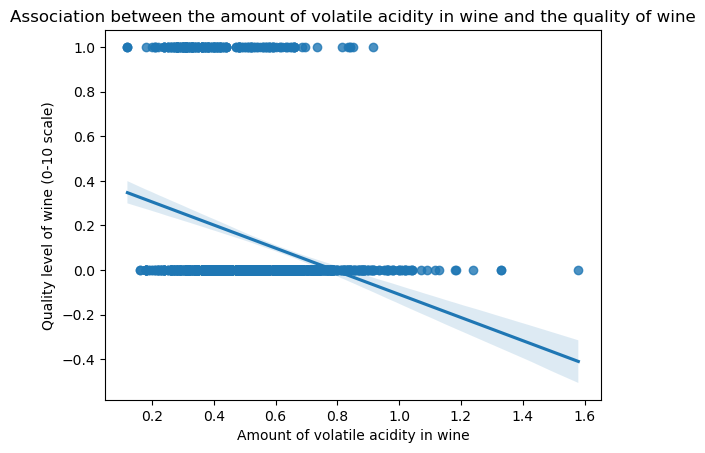

mean of the volatile acidity variable =  0.5278205128205128
mean of the volatile acidity variable after normalization =  3.443843778699673e-17

OLS regression model for the association between the amount of volatile acidity in wine and the quality of wine:
                            OLS Regression Results                            
Dep. Variable:              quality_c   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     126.3
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           2.96e-28
Time:                        16:38:14   Log-Likelihood:                -494.64
No. Observations:                1599   AIC:                             993.3
Df Residuals:                    1597   BIC:                             1004.
Df Model:                           1                                         
Covariance Type:            nonr

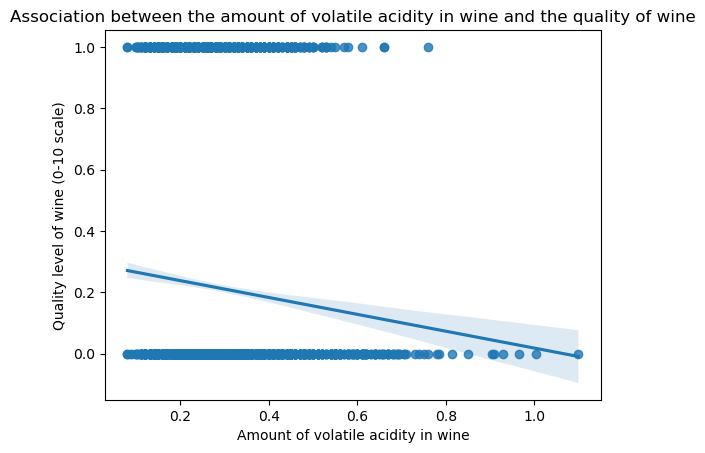

mean of the volatile acidity variable =  0.27824111882400976
mean of the volatile acidity variable after normalization =  4.4245719560398236e-17

OLS regression model for the association between the amount of volatile acidity in wine and the quality of wine:
                            OLS Regression Results                            
Dep. Variable:              quality_c   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     22.23
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           2.49e-06
Time:                        16:38:14   Log-Likelihood:                -2593.3
No. Observations:                4898   AIC:                             5191.
Df Residuals:                    4896   BIC:                             5204.
Df Model:                           1                                         
Covariance Type:            no

In [120]:
def basic_linear(wine_set):
     # recode quality into 2 groups: 0:{3,4,5,6}, 1:{7,8,9}
    recode = {3: 0, 4: 0, 5:0, 6:0, 7:1, 8:1, 9:1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)
    scat0 = seaborn.regplot(x="volatile_acidity", y="quality_c", fit_reg=True, data=wine_set)
    plt.xlabel("Amount of volatile acidity in wine")
    plt.ylabel("Quality level of wine (0-10 scale)")
    plt.title("Association between the amount of volatile acidity in wine and the quality of wine")
    plt.show()

    # centering the explanatory variable by subrtacting the mean
    f_acidity_mean = wine_set["volatile_acidity"].mean()
    print("mean of the volatile acidity variable = ", f_acidity_mean)
    wine_set["volatile_acidity"] = wine_set["volatile_acidity"] - f_acidity_mean
    print("mean of the volatile acidity variable after normalization = ", wine_set["volatile_acidity"].mean())

    print ("\nOLS regression model for the association between the amount of volatile acidity in wine and the quality of wine:")
    model1 = smf.ols(formula="quality_c ~ volatile_acidity", data=wine_set)
    results1 = model1.fit()
    print(results1.summary())


call(basic_linear)

## Which model is best modality to use make predictions on red/white wine quality
### Ans: based on all the modality that we ran, Random Forest appears to be the best modality to use to make predictions of wine quality, with an accuracy of 85% predicting red wine quality while white wine prediction is at 83%.

In [121]:
# Use random forests to predict the quality of wine
# split the data into features and target for red wine
recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
red_wine['quality_c'] = red_wine['quality'].map(recode)
display(red_wine)
        
X_red = red_wine.drop(columns=['color', 'quality', 'quality_quart', 'quality_c'])
y_red = red_wine['quality_c']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=3)
print(X_train_red.shape, X_test_red.shape, y_train_red.shape, y_test_red.shape)

red_wine_model = RandomForestClassifier(n_estimators=100, random_state=3)
red_wine_model.fit(X_train_red, y_train_red)
y_test_pred_red = red_wine_model.predict(X_test_red)
test_data_accuracy_red = accuracy_score(y_test_pred_red, y_test_red)
print('Red Wine Accuracy:', round(test_data_accuracy_red, 2))


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,quality_quart,quality_c
0,7.4,0.172179,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,"(2.999, 5.0]",0
1,7.8,0.352179,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,"(2.999, 5.0]",0
2,7.8,0.232179,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,"(2.999, 5.0]",0
3,11.2,-0.247821,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,"(5.0, 6.0]",1
4,7.4,0.172179,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,"(2.999, 5.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.072179,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red,"(2.999, 5.0]",0
1595,5.9,0.022179,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red,"(5.0, 6.0]",1
1596,6.3,-0.017821,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red,"(5.0, 6.0]",1
1597,5.9,0.117179,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red,"(2.999, 5.0]",0


(1279, 11) (320, 11) (1279,) (320,)
Red Wine Accuracy: 0.84


In [122]:
# Use random forests to predict the quality of wine
# split the data into features and target for red wine
display(white_wine)
recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
white_wine['quality_c'] = white_wine['quality'].map(recode)
display(red_wine)
X_white = white_wine.drop(columns=['color', 'quality', 'quality_quart', 'quality_c'])
y_white = white_wine['quality_c']

X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.2, random_state=3)
print(X_train_white.shape, X_test_white.shape, y_train_white.shape, y_test_white.shape)

white_wine_model = RandomForestClassifier(n_estimators=100, random_state=3)
white_wine_model.fit(X_train_white, y_train_white)
y_test_pred_white = white_wine_model.predict(X_test_white)
test_data_accuracy_white = accuracy_score(y_test_pred_white, y_test_white)
print('White Wine Accuracy:', round(test_data_accuracy_white, 2))


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,quality_quart,quality_c
1599,7.0,-0.008241,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white,"(5.0, 6.0]",0
1600,6.3,0.021759,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white,"(5.0, 6.0]",0
1601,8.1,0.001759,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white,"(5.0, 6.0]",0
1602,7.2,-0.048241,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,"(5.0, 6.0]",0
1603,7.2,-0.048241,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,"(5.0, 6.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,-0.068241,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,"(5.0, 6.0]",0
6493,6.6,0.041759,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,"(2.999, 5.0]",0
6494,6.5,-0.038241,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,"(5.0, 6.0]",0
6495,5.5,0.011759,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,"(6.0, 9.0]",1


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,quality_quart,quality_c
0,7.4,0.172179,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,"(2.999, 5.0]",0
1,7.8,0.352179,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,"(2.999, 5.0]",0
2,7.8,0.232179,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,"(2.999, 5.0]",0
3,11.2,-0.247821,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,"(5.0, 6.0]",1
4,7.4,0.172179,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,"(2.999, 5.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.072179,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red,"(2.999, 5.0]",0
1595,5.9,0.022179,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red,"(5.0, 6.0]",1
1596,6.3,-0.017821,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red,"(5.0, 6.0]",1
1597,5.9,0.117179,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red,"(2.999, 5.0]",0


(3918, 11) (980, 11) (3918,) (980,)
White Wine Accuracy: 0.83


## Now we are using a random input data from the red data set to test our model

In [123]:
red_input_data = [[7.4, 0.7, 0, 1.9, 0.076, 11, 34, 0.9978, 3.51, 0.56, 9.4]]
red_input_data_as_np = np.array(red_input_data)
red_input_data_as_np = red_input_data_as_np.reshape(1, -1)
red_pred = red_wine_model.predict(red_input_data_as_np)
if red_pred == 0:
    print('Red Wine Quality: Low') 
else:
    print('Red Wine Quality: High')

Red Wine Quality: Low


## Now we are using a random input data from the white data set to test our model

In [124]:
white_input_data = [[6.3, 0.30, 0.34, 1.6,0.049, 14.0, 132.0, 0.99400, 3.30, 0.49, 9.5]]
white_input_data_as_np = np.array(white_input_data)
white_input_data_as_np = white_input_data_as_np.reshape(1, -1)
white_pred = white_wine_model.predict(white_input_data_as_np)
if white_pred == 0:
    print('White Wine Quality: Low') 
else:
    print('White Wine Quality: High')

White Wine Quality: Low
